# DSP - Sampling Exercise
***
**Federal University of Campina Grande (Universidade Federal de Campina Grande)**

Author: **João Pedro Melquiades Gomes**

Email: **joao.melquiades@ee.ufcg.edu.br**
***

## Generating the signal
***
This entire exercise will use the following signal:

<center>$x(t) = cos(2\pi3200t) + 0.5cos(2\pi600t) + 0.01cos(2\pi300t)$</center>

I will assume that some greater frequency components corrupted the signal, just to apply the anti-aliasing filter before sampling

First, we have three frequency components in this signal: $f_1 = 300Hz$, $f_2 = 600Hz$ and $f_3 = 3200Hz$. Thus, the Fourier transform will be three impulse pairs centered in 0 and located at $\pm f_1, \pm f_2$ and $\pm f_3$. Once we are simulating an analogic signal in digital world, the representation will not be exactly three impulses, and there will be a lot of noise because we are adding it. So, let's code.

In [2]:
# Important imports
import numpy as np
from scipy.fft import fft, ifft, fftshift, ifftshift, fftfreq
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interpolate
sns.set_theme()

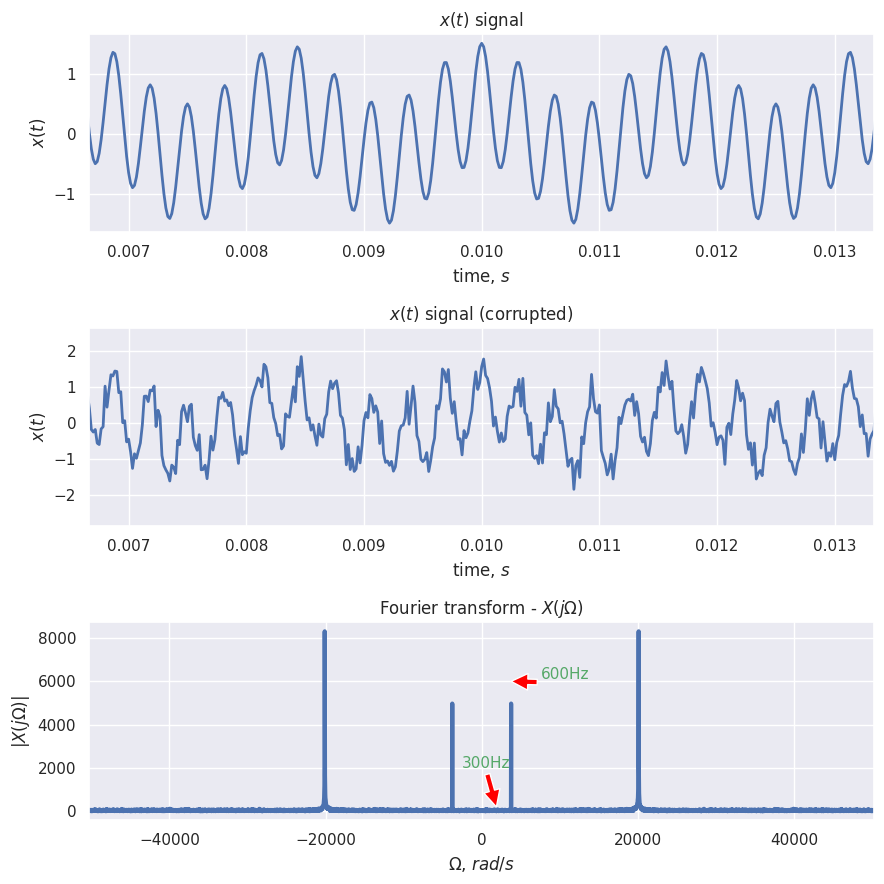

In [3]:
# Let's save 100 periods of the fundamental frequency of signal

f_1 = 300 #Hz
f_2 = 600 #Hz
f_x = 3200 #Hz

# This doesn't make sense, it is only to simulate the analogic signal, but in fact it is a digital
# one with this sampling frequency
analog_fs = 1/60000

t = np.arange(0, 100*1/f_1, analog_fs)

# signal declaration
xt = np.cos(2*np.pi*f_x*t) + 0.5*np.cos(2*np.pi*f_2*t) + 0.01*np.cos(2*np.pi*f_1*t)

#Let's add some noise to make things more interesting
noise = np.random.normal(0,0.3,t.size)#0.1*np.cos(2*np.pi*2*f_x*t) + 0.1*np.cos(2*np.pi*2.2*f_x*t) + 0.1*np.cos(2*np.pi*2.3*f_x*t)


plt.figure(figsize=(9,9))


# Time domain
plt.subplot(3,1,1)
plt.plot(t, xt, linewidth=2)
plt.title("$x(t)$ signal")
plt.xlabel("time, $s$")
plt.ylabel("$x(t)$")
# Only shows two periods
plt.xlim(2/f_1, 4/f_1)


plt.subplot(3,1,2)
plt.plot(t, xt + noise, linewidth=2)
plt.title("$x(t)$ signal (corrupted)")
plt.xlabel("time, $s$")
plt.ylabel("$x(t)$")
# Only shows two periods
plt.xlim(2/f_1, 4/f_1)

# Frequency domain

plt.subplot(3,1,3)

# The fftshift centers the representation in 0, and we can observe
# how the analogic fourier transform should be. Also, the DFT range is
# -2pi to 2pi. In fact, this is a discret fourier transform. I am converting
# the frequency axis from rad to Hz to show the representation of analogic
# fourier transform

Xf = fftshift(fft(xt + noise))
f = fftshift(fftfreq(t.size, t[1]-t[0]))
w = 2*np.pi*f
plt.plot(w, np.abs(Xf), linewidth=3)
plt.grid("on", which="both")
plt.xlim(-2.5*2*np.pi*f_x, 2.5*2*np.pi*f_x)
plt.title("Fourier transform - $X(j\Omega)$")
plt.xlabel("$\Omega$, $rad/s$")
plt.ylabel("$|X(j\Omega)|$")


plt.annotate('300Hz', xy = (300*2*np.pi, 200), 
             fontsize = 11, xytext = (-400*2*np.pi, 2000), 
             arrowprops = dict(facecolor = 'red'),
             color = 'g')
plt.annotate('600Hz', xy = (600*2*np.pi, 6000), 
             fontsize = 11, xytext = (1200*2*np.pi, 6100), 
             arrowprops = dict(facecolor = 'red'),
             color = 'g')
plt.annotate('3200Hz', xy = (3200*2*np.pi, 10000), 
             fontsize = 11, xytext = (4200*2*np.pi, 10000), 
             arrowprops = dict(facecolor = 'red'),
             color = 'g')

plt.tight_layout()
plt.show()



## Anti-aliasing filter

In order to eliminate the unwanted frequencies, we must apply a low-pass filter in $x(t)$. This is done to attenuate the frequencies that are bigger than the maximum frequency that we are interested. So, here I will implement a second-order Low-pass filter with cut-frequency $f_c = 3.2kHz$



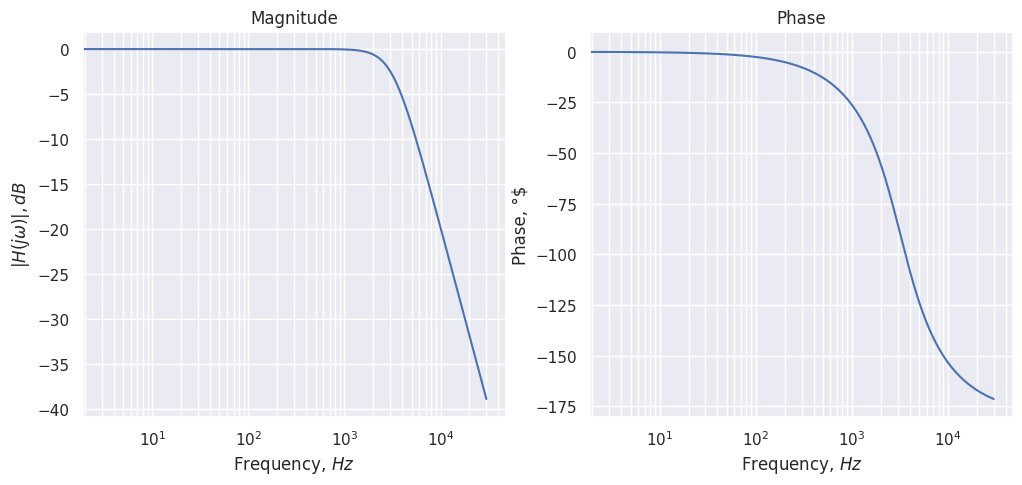

In [4]:
w_c = 2*np.pi*f_x
aa_filter = w_c**2 / ((w_c**2 - (2*np.pi*f)**2) +1j*np.sqrt(2)*w_c*2*np.pi*f)

# The bode diagram
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.title('Magnitude')
plt.xlabel('Frequency, $Hz$')
plt.ylabel('$|H(j\omega)|, dB$')
plt.semilogx(f, 20*np.log10(np.abs(aa_filter)))
plt.grid('on', which='both')
plt.subplot(1, 2, 2)
plt.title('Phase')
plt.xlabel('Frequency, $Hz$')
plt.ylabel('Phase, °$')
plt.semilogx(f, np.angle(aa_filter)*180/np.pi)
plt.ylim(-180, 10)
plt.grid('on', which='both')
plt.show()

/home/joao/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


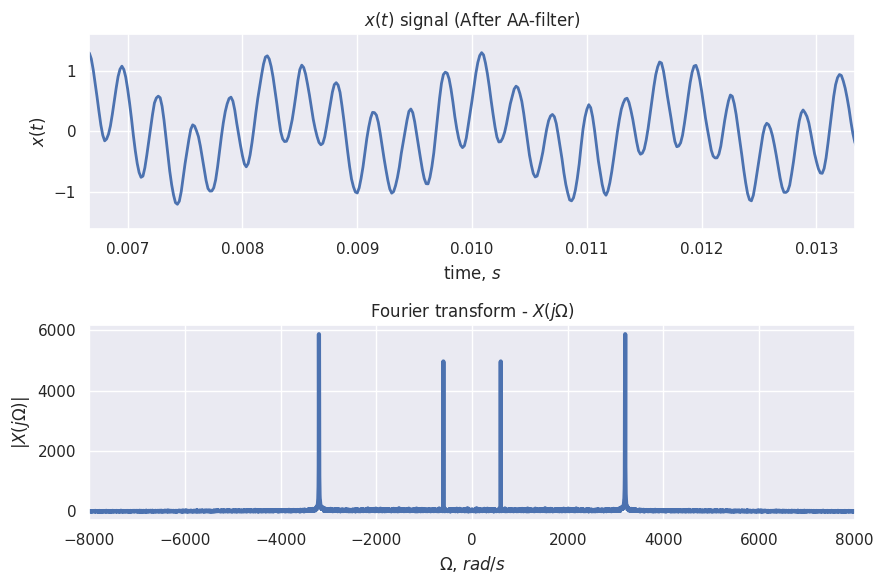

In [5]:
#Now, let's multiply this filter by x(t), resulting in the filtered signal

Xf_filtered = Xf*aa_filter
xt_filtered = ifft(ifftshift(Xf_filtered))

plt.figure(figsize=(9,6))



plt.subplot(2,1,1)
plt.plot(t, xt_filtered, linewidth=2)
plt.title("$x(t)$ signal (After AA-filter)")
plt.xlabel("time, $s$")
plt.ylabel("$x(t)$")
# Only shows two periods
plt.xlim(2/f_1, 4/f_1)

# Frequency domain

plt.subplot(2,1,2)


plt.plot(f, np.abs(Xf_filtered), linewidth=3)
plt.grid("on", which="both")
plt.xlim(-2.5*f_x, 2.5*f_x)
plt.title("Fourier transform - $X(j\Omega)$")
plt.xlabel("$\Omega$, $rad/s$")
plt.ylabel("$|X(j\Omega)|$")

plt.tight_layout()
plt.show()


We can observe that the higher frequencies now are attenuated. They still will invade the spectrum of adjacent copies of FFT, as we will see below, but they won't interfere too much.

## Sampling the signal
***

When we sample the signal, we create multiple copies of the spectrum response along the frequency axis. These copies are centered in multiples of sampling frequency ($f_s$). Because of that, if the sampling frequency is to low, two or more copies of the spectrum will collide, causing aliasing and turning impossible to recover the signal. This is a summary of the reason why we use the Nyquist theorem:

<center>$f_s \ge 2f_x$</center>

So, the maximum frequency component of $x(t)$ is $f_x = 3.2kHz$. We must use a sampling frequency of more than $6.4ksps$. Here, I am using bigger value, $8ksps$.

Here, we will simulate the convolution with a impulse train. The impulse train is 1 in sampling times, and 0 in another ones.

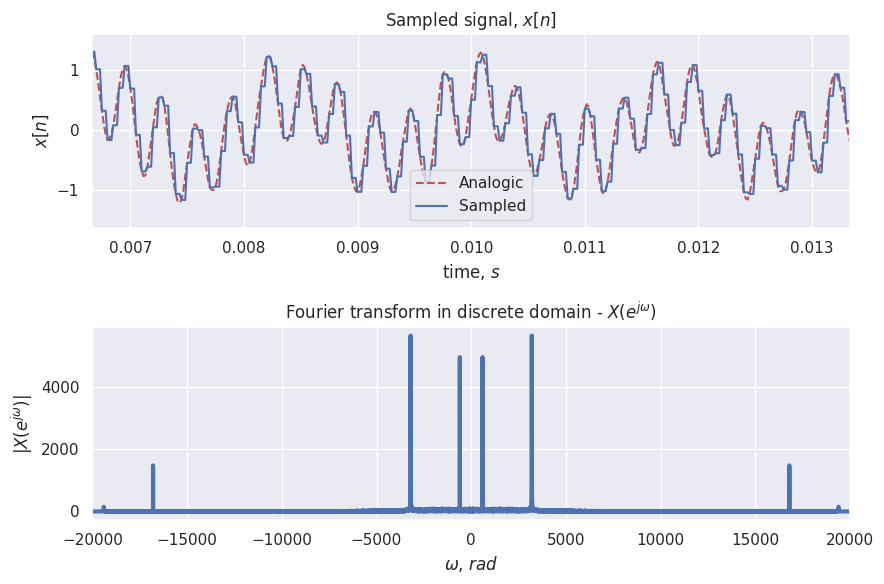

In [6]:
f_s = 20e3 # sps

# Defining sampling arrays
# t_sampled = np.arange(0, 100/f_1, 1/f_s)
xn = np.zeros(t.size)

# Sampling
for i in range(xn.size):
    if(i%((1/analog_fs)/f_s) == 0):
        xn[i] = xt_filtered.real[i]
    else:
        xn[i] = xn[i-1]



# # Defining sampling arrays
# xn = np.zeros(int(t.size/((1/analog_fs)/f_s)))
# tn = np.zeros(int(t.size/((1/analog_fs)/f_s)))
# for i in range(xn.size):
#     xn[i] = xt_filtered.real[int(i*(((1/analog_fs)/f_s)))]
#     tn[i] = t[int(i*(((1/analog_fs)/f_s)))]
        

plt.figure(figsize=(9,6))
plt.subplot(2,1,1)
plt.plot(t, xt_filtered, '--r')
plt.plot(t, xn)
plt.title("Sampled signal, $x[n]$")
plt.xlabel("time, $s$")
plt.ylabel("$x[n]$")
plt.legend(['Analogic', 'Sampled'])
# Only shows two periods
plt.xlim(2/f_1, 4/f_1)

# Frequency domain
plt.subplot(2,1,2)

Xf_sampled = fftshift(fft(xn, t.size))
f_sampled = fftshift(fftfreq(t.size, t[1]-t[0]))

plt.plot(f_sampled, np.abs(Xf_sampled), linewidth=3)
plt.grid("on", which="both")
plt.title("Fourier transform in discrete domain - $X(e^{j\omega})$")
plt.xlabel("$\omega$, $rad$")
plt.ylabel("$|X(e^{j\omega})|$")
plt.xlim(-f_s, f_s)

plt.tight_layout()
plt.show()

The FFT will always generate a spectrum that inside the interval $[-\pi, \pi]$, or, in terms of sampling frequency $[-\frac{f_s}{2}, \frac{f_s}{2}]$. It is important to know that this is not the entire frequency response of the signal. The DFT is periodic with period $2\pi$. Once the Nyquist theorem was respected, there is no aliasing. in this case we can see more than one image because the $f_s$ considered by the algorithm is the "sampling frequency" of analogic signal.

***
## Recovering
***

Here, we will first see the recovering with $f_s = 36ksps$, then we will re-sample the original signal using $f_s/2$ and $f_s/4$ to check the effects of aliasing. 

In order to recover the signal, we just have to pass another low-pass filter. The cut frequency this time will be $f_s/2$, because this is where the signal starts to repeat.

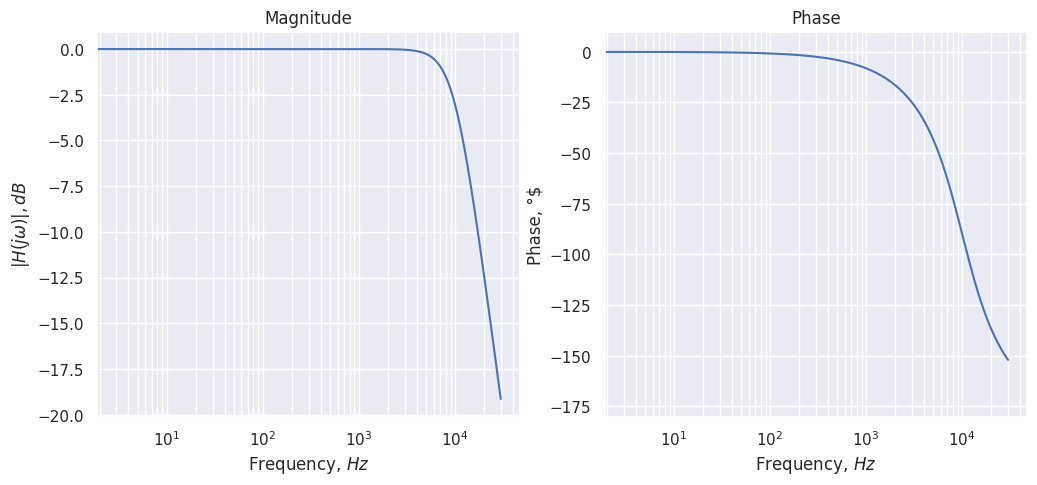

In [7]:
w_c = 2*np.pi*f_s/2
rec_filter = w_c**2 / ((w_c**2 - (2*np.pi*f_sampled)**2) +1j*np.sqrt(2)*w_c*2*np.pi*f_sampled)

# The bode diagram
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.title('Magnitude')
plt.xlabel('Frequency, $Hz$')
plt.ylabel('$|H(j\omega)|, dB$')
plt.semilogx(f_sampled, 20*np.log10(np.abs(rec_filter)))
plt.grid('on', which='both')
plt.subplot(1, 2, 2)
plt.title('Phase')
plt.xlabel('Frequency, $Hz$')
plt.ylabel('Phase, °$')
plt.semilogx(f_sampled, np.angle(rec_filter)*180/np.pi)
plt.ylim(-180, 10)
plt.grid('on', which='both')
plt.show()

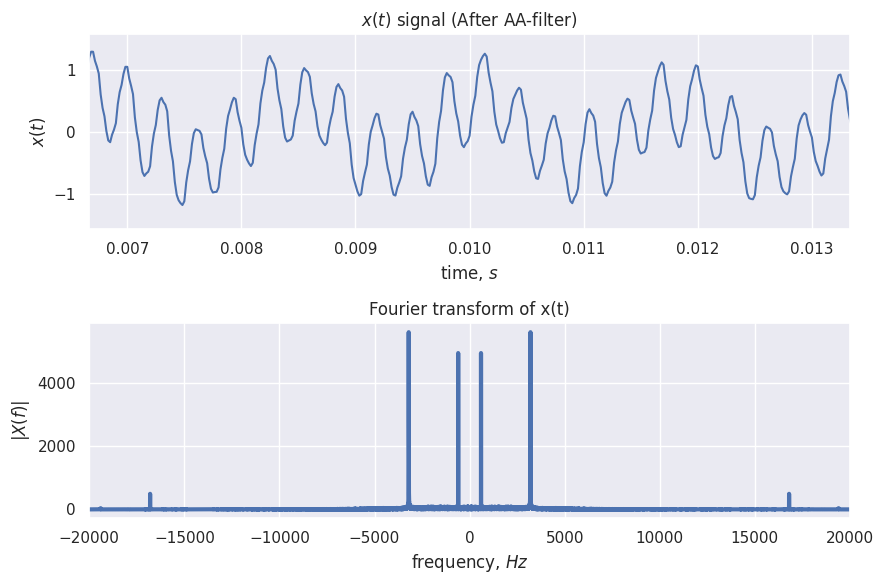

In [8]:
Xf_rec = Xf_sampled*rec_filter
xt_rec = ifft(ifftshift(Xf_rec))

plt.figure(figsize=(9,6))

# # Interpolating the signal to show full recovered signal
# f = interpolate.interp1d(t_sampled, xt_rec, kind='cubic')
# xt_new = f(t[0:30000])


plt.subplot(2,1,1)
plt.plot(t, xt_rec)
plt.title("$x(t)$ signal (After AA-filter)")
plt.xlabel("time, $s$")
plt.ylabel("$x(t)$")
# Only shows two periods
plt.xlim(2/f_1, 4/f_1)

# Frequency domain

plt.subplot(2,1,2)


plt.plot(f_sampled, np.abs(Xf_rec), linewidth=3)
plt.grid("on", which="both")
plt.title("Fourier transform of x(t)")
plt.xlabel("frequency, $Hz$")
plt.ylabel("$|X(f)|$")
plt.xlim(-f_s, f_s)
plt.tight_layout()
plt.show()





### With $f_s = f_s/2$

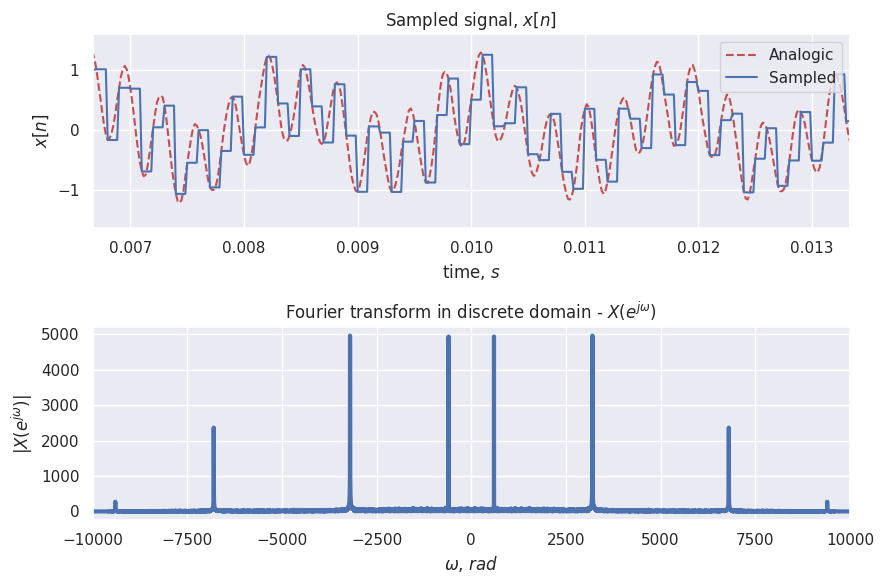

In [9]:
f_s = 10e3 # sps

# Defining sampling arrays
# t_sampled = np.arange(0, 100/f_1, 1/f_s)
xn = np.zeros(t.size)

# Sampling
for i in range(xn.size):
    if(i%((1/analog_fs)/f_s) == 0):
        xn[i] = xt_filtered.real[i]
    else:
        xn[i] = xn[i-1]
plt.figure(figsize=(9,6))


plt.subplot(2,1,1)
plt.plot(t, xt_filtered, '--r')
plt.plot(t, xn)
plt.title("Sampled signal, $x[n]$")
plt.xlabel("time, $s$")
plt.ylabel("$x[n]$")
plt.legend(['Analogic', 'Sampled'])
# Only shows two periods
plt.xlim(2/f_1, 4/f_1)

# Frequency domain


# zero-padding
padded_xn = np.zeros(t.size)
for i in range(0, xn.size):
    padded_xn[i] = xn[i]


plt.subplot(2,1,2)

Xf_sampled = fftshift(fft(xn))
f_sampled = fftshift(fftfreq(t.size, t[1]-t[0]))

plt.plot(f_sampled, np.abs(Xf_sampled), linewidth=3)
plt.grid("on", which="both")
plt.xlim(-f_s, f_s)
plt.title("Fourier transform in discrete domain - $X(e^{j\omega})$")
plt.xlabel("$\omega$, $rad$")
plt.ylabel("$|X(e^{j\omega})|$")

plt.tight_layout()
plt.show()

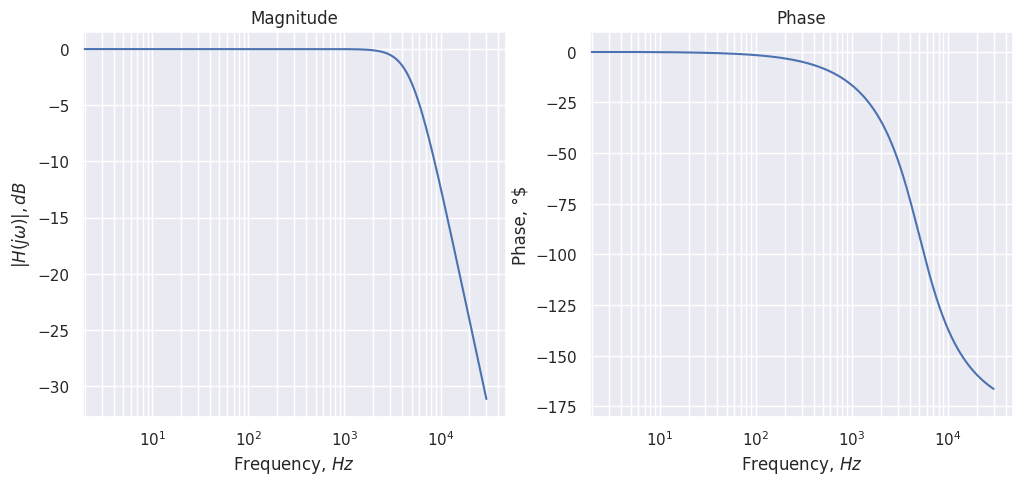

In [10]:
w_c = 2*np.pi*f_s/2
rec_filter = w_c**2 / ((w_c**2 - (2*np.pi*f_sampled)**2) +1j*np.sqrt(2)*w_c*2*np.pi*f_sampled)

# The bode diagram
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.title('Magnitude')
plt.xlabel('Frequency, $Hz$')
plt.ylabel('$|H(j\omega)|, dB$')
plt.semilogx(f_sampled, 20*np.log10(np.abs(rec_filter)))
plt.grid('on', which='both')
plt.subplot(1, 2, 2)
plt.title('Phase')
plt.xlabel('Frequency, $Hz$')
plt.ylabel('Phase, °$')
plt.semilogx(f_sampled, np.angle(rec_filter)*180/np.pi)
plt.ylim(-180, 10)
plt.grid('on', which='both')
plt.show()

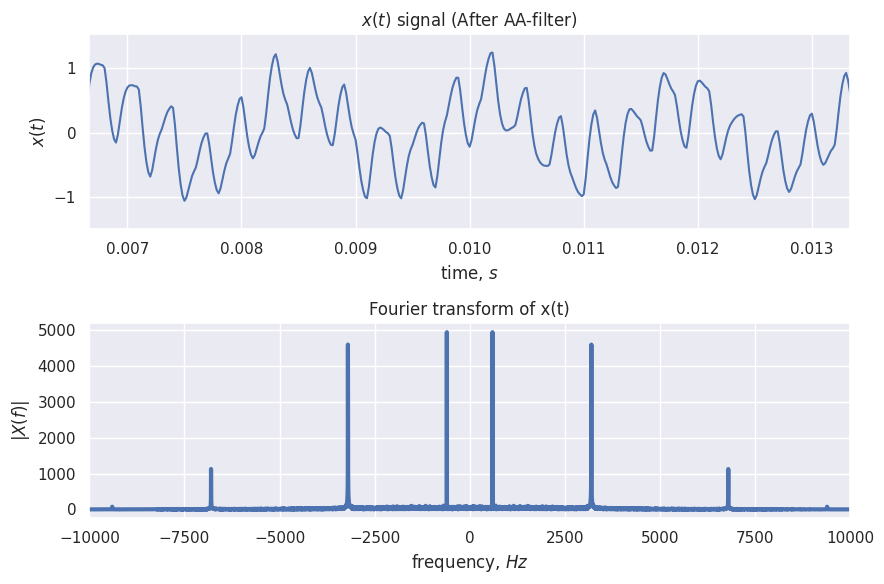

In [11]:
Xf_rec = Xf_sampled*rec_filter
xt_rec = ifft(ifftshift(Xf_rec))

plt.figure(figsize=(9,6))

# # Interpolating the signal to show full recovered signal
# f = interpolate.interp1d(t_sampled, xt_rec, kind='cubic')
# xt_new = f(t[0:30000])


plt.subplot(2,1,1)
plt.plot(t, xt_rec)
plt.title("$x(t)$ signal (After AA-filter)")
plt.xlabel("time, $s$")
plt.ylabel("$x(t)$")
# Only shows two periods
plt.xlim(2/f_1, 4/f_1)

# Frequency domain

plt.subplot(2,1,2)


plt.plot(f_sampled, np.abs(Xf_rec), linewidth=3)
plt.grid("on", which="both")
plt.title("Fourier transform of x(t)")
plt.xlabel("frequency, $Hz$")
plt.ylabel("$|X(f)|$")
plt.xlim(-f_s, f_s)
plt.tight_layout()
plt.show()




### With $f_s = f_s/4$

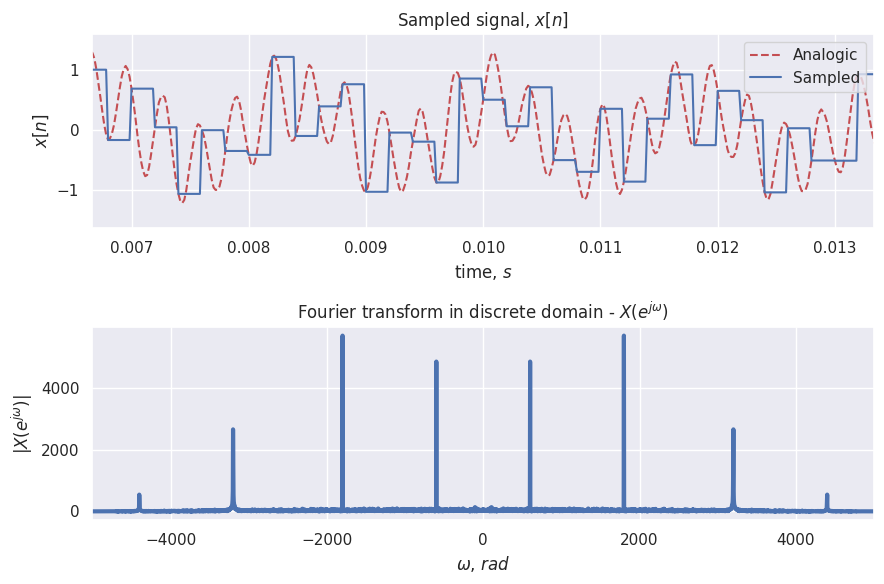

In [12]:
f_s = 5e3 # sps

# Defining sampling arrays
# t_sampled = np.arange(0, 100/f_1, 1/f_s)
xn = np.zeros(t.size)

# Sampling
for i in range(xn.size):
    if(i%((1/analog_fs)/f_s) == 0):
        xn[i] = xt_filtered.real[i]
    else:
        xn[i] = xn[i-1]
plt.figure(figsize=(9,6))


plt.subplot(2,1,1)
plt.plot(t, xt_filtered, '--r')
plt.plot(t, xn)
plt.title("Sampled signal, $x[n]$")
plt.xlabel("time, $s$")
plt.ylabel("$x[n]$")
plt.legend(['Analogic', 'Sampled'])
# Only shows two periods
plt.xlim(2/f_1, 4/f_1)

# Frequency domain


# zero-padding
padded_xn = np.zeros(t.size)
for i in range(0, xn.size):
    padded_xn[i] = xn[i]


plt.subplot(2,1,2)

Xf_sampled = fftshift(fft(xn))
f_sampled = fftshift(fftfreq(t.size, t[1]-t[0]))

plt.plot(f_sampled, np.abs(Xf_sampled), linewidth=3)
plt.grid("on", which="both")
plt.xlim(-f_s, f_s)
plt.title("Fourier transform in discrete domain - $X(e^{j\omega})$")
plt.xlabel("$\omega$, $rad$")
plt.ylabel("$|X(e^{j\omega})|$")

plt.tight_layout()
plt.show()

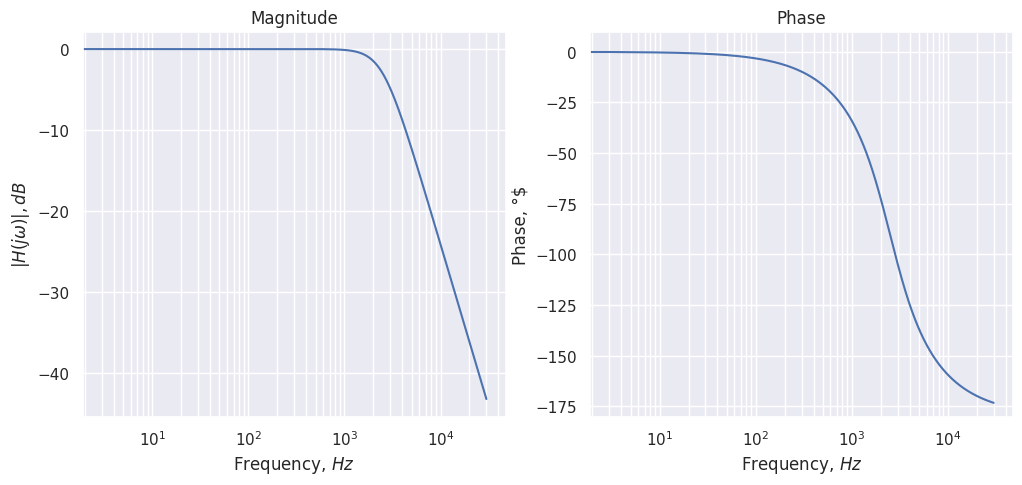

In [13]:
w_c = 2*np.pi*f_s/2
rec_filter = w_c**2 / ((w_c**2 - (2*np.pi*f_sampled)**2) +1j*np.sqrt(2)*w_c*2*np.pi*f_sampled)

# The bode diagram
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.title('Magnitude')
plt.xlabel('Frequency, $Hz$')
plt.ylabel('$|H(j\omega)|, dB$')
plt.semilogx(f_sampled, 20*np.log10(np.abs(rec_filter)))
plt.grid('on', which='both')
plt.subplot(1, 2, 2)
plt.title('Phase')
plt.xlabel('Frequency, $Hz$')
plt.ylabel('Phase, °$')
plt.semilogx(f_sampled, np.angle(rec_filter)*180/np.pi)
plt.ylim(-180, 10)
plt.grid('on', which='both')
plt.show()

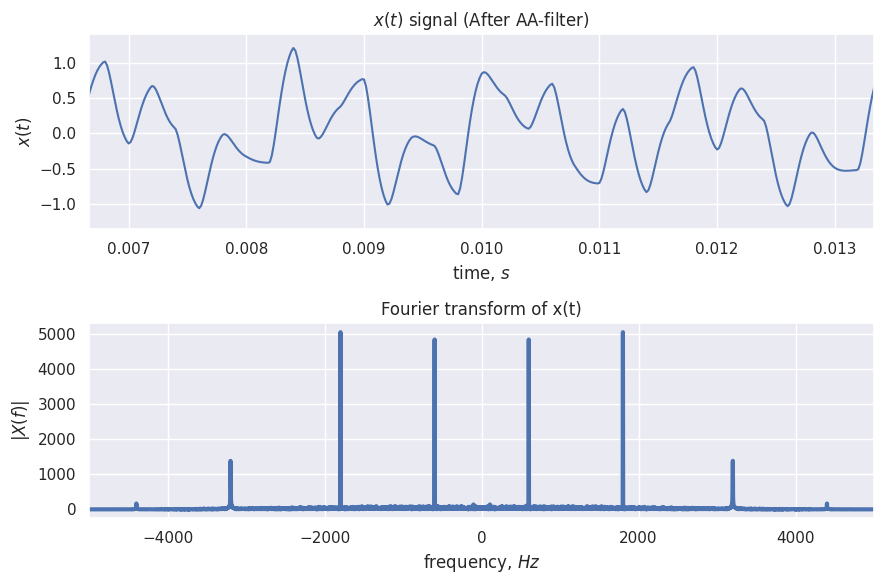

In [14]:
Xf_rec = Xf_sampled*rec_filter
xt_rec = ifft(ifftshift(Xf_rec))

plt.figure(figsize=(9,6))

# # Interpolating the signal to show full recovered signal
# f = interpolate.interp1d(t_sampled, xt_rec, kind='cubic')
# xt_new = f(t[0:30000])


plt.subplot(2,1,1)
plt.plot(t, xt_rec)
plt.title("$x(t)$ signal (After AA-filter)")
plt.xlabel("time, $s$")
plt.ylabel("$x(t)$")
# Only shows two periods
plt.xlim(2/f_1, 4/f_1)

# Frequency domain

plt.subplot(2,1,2)


plt.plot(f_sampled, np.abs(Xf_rec), linewidth=3)
plt.grid("on", which="both")
plt.title("Fourier transform of x(t)")
plt.xlabel("frequency, $Hz$")
plt.xlim(-f_s, f_s)

plt.ylabel("$|X(f)|$")
plt.tight_layout()
plt.show()



## Decimation

Decimation is the process of removing samples of signal. We do this by calculating:

<center>$x_d(n) = x(Ln)$</center>

To this exercise, we will utilizate $f_s = 6ksps$. First, let's re-sample $x(t)$ with this sampling frequency

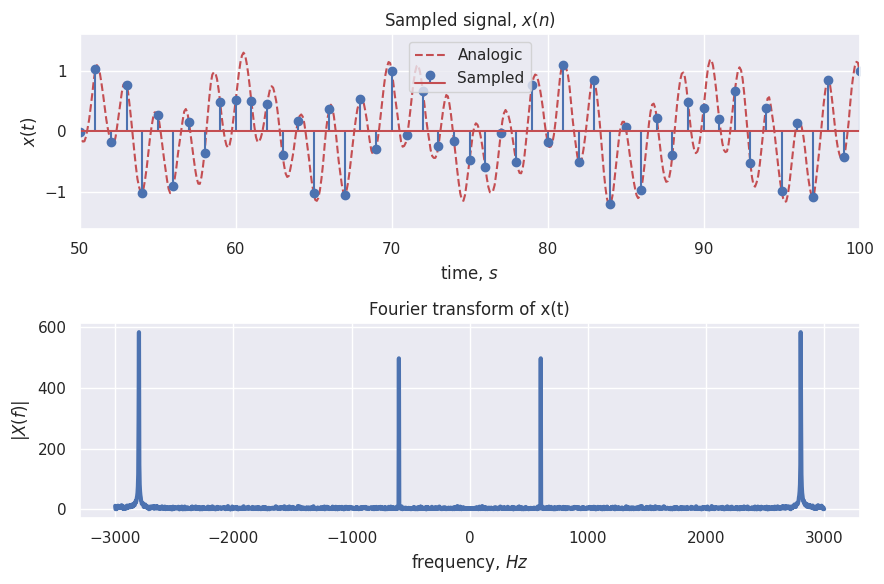

In [108]:
f_s = 6e3 # sps

# Defining sampling arrays
t_sampled = np.arange(0, t.size/(1/analog_fs/f_s))
xn = np.zeros(t_sampled.size)

# Sampling
for i in range(xn.size):
    xn[i] = xt_filtered.real[int(i/analog_fs/f_s)]
plt.figure(figsize=(9,6))


plt.subplot(2,1,1)
plt.plot(t*f_s, xt_filtered, '--r')
plt.stem(t_sampled, xn)
plt.title("Sampled signal, $x(n)$")
plt.xlabel("time, $s$")
plt.ylabel("$x(t)$")
plt.legend(['Analogic', 'Sampled'])
# Only shows two periods
plt.xlim(50, 100)

# Frequency domain


# zero-padding
padded_xn = np.zeros(t.size)
for i in range(0, xn.size):
    padded_xn[i] = xn[i]


plt.subplot(2,1,2)

Xf_sampled = fftshift(fft(xn))
f_sampled = fftshift(fftfreq(t_sampled.size, 1/f_s))

plt.plot(f_sampled, np.abs(Xf_sampled), linewidth=3)
plt.grid("on", which="both")
# plt.xlim(-f_s/2, f_s/2)
plt.title("Fourier transform of x(t)")
plt.xlabel("frequency, $Hz$")
plt.ylabel("$|X(f)|$")

plt.tight_layout()
plt.show()

### $L = 2$

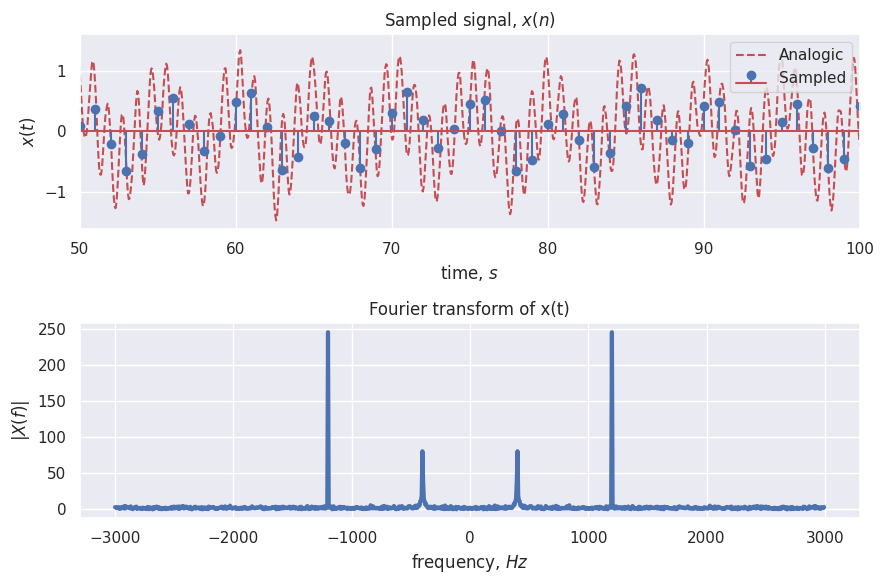

In [109]:
L = 2

# Low-pass filter
w_c = 2*np.pi*f_s/(2*L)
filt = w_c**2 / ((w_c**2 - (2*np.pi*f_sampled)**2) +1j*np.sqrt(2)*w_c*2*np.pi*f_sampled)

Xf_filt = Xf_sampled*filt
xn_filt = ifft(ifftshift(Xf_filt))

# Defining sampling arrays
t_decimated = np.arange(0, int(t_sampled.size/L))
x_decimated = np.zeros(t_decimated.size)

# Sampling
for i in range(x_decimated.size):
    x_decimated[i] = xn_filt.real[int(i*L)]
#     t_decimated[i] = t_sampled[int(i*L)]
plt.figure(figsize=(9,6))


plt.subplot(2,1,1)
plt.plot(t*f_s/L, xt_filtered, '--r')
plt.stem(t_decimated, x_decimated)
plt.title("Sampled signal, $x(n)$")
plt.xlabel("time, $s$")
plt.ylabel("$x(t)$")
plt.legend(['Analogic', 'Sampled'])
# Only shows two periods
plt.xlim(50, 100)

# Frequency domain

plt.subplot(2,1,2)

Xf_decimated = fftshift(fft(x_decimated))
f_decimated = fftshift(fftfreq(t_decimated.size, 1/f_s))

plt.plot(f_decimated, np.abs(Xf_decimated), linewidth=3)
plt.grid("on", which="both")
# plt.xlim(-2*f_s/2, 2*f_s/2)
plt.title("Fourier transform of x(t)")
plt.xlabel("frequency, $Hz$")
plt.ylabel("$|X(f)|$")

plt.tight_layout()
plt.show()


### $L = 5$ 

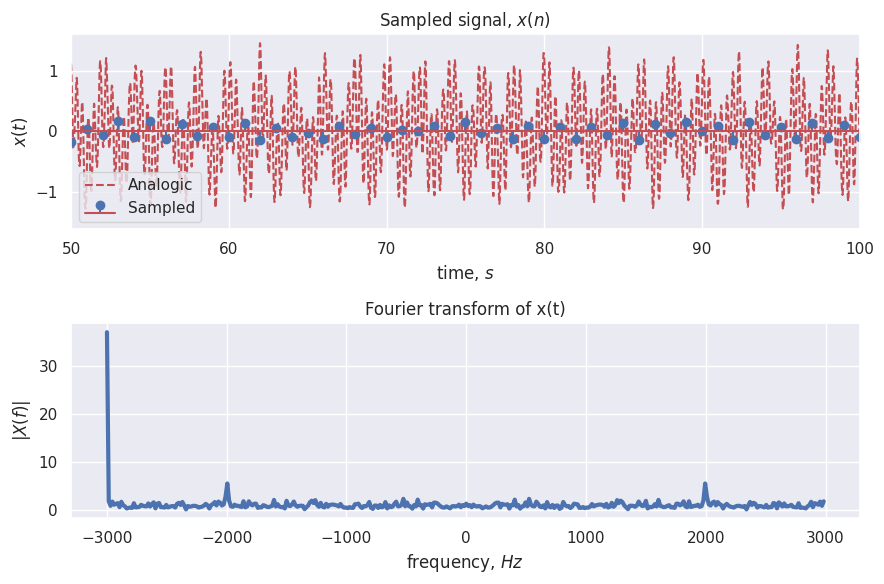

In [110]:
L = 5
# Low-pass filter
w_c = 2*np.pi*f_s/(2*L)
filt = w_c**2 / ((w_c**2 - (2*np.pi*f_sampled)**2) +1j*np.sqrt(2)*w_c*2*np.pi*f_sampled)

Xf_filt = Xf_sampled*filt
xn_filt = ifft(ifftshift(Xf_filt))

# Defining sampling arrays
t_decimated = np.arange(0, int(t_sampled.size/L))
x_decimated = np.zeros(t_decimated.size)

# Sampling
for i in range(x_decimated.size):
    x_decimated[i] = xn_filt.real[int(i*L)]
#     t_decimated[i] = t_sampled[int(i*L)]
plt.figure(figsize=(9,6))


plt.subplot(2,1,1)
plt.plot(t*f_s/L, xt_filtered, '--r')
plt.stem(t_decimated, x_decimated)
plt.title("Sampled signal, $x(n)$")
plt.xlabel("time, $s$")
plt.ylabel("$x(t)$")
plt.legend(['Analogic', 'Sampled'])
plt.xlim(50, 100)
# Only shows two periods

# Frequency domain

plt.subplot(2,1,2)

Xf_decimated = fftshift(fft(x_decimated))
f_decimated = fftshift(fftfreq(t_decimated.size, 1/f_s))

plt.plot(f_decimated, np.abs(Xf_decimated), linewidth=3)
plt.grid("on", which="both")
# plt.xlim(-2*f_s/2, 2*f_s/2)
plt.title("Fourier transform of x(t)")
plt.xlabel("frequency, $Hz$")
plt.ylabel("$|X(f)|$")

plt.tight_layout()
plt.show()

### $L = 10$

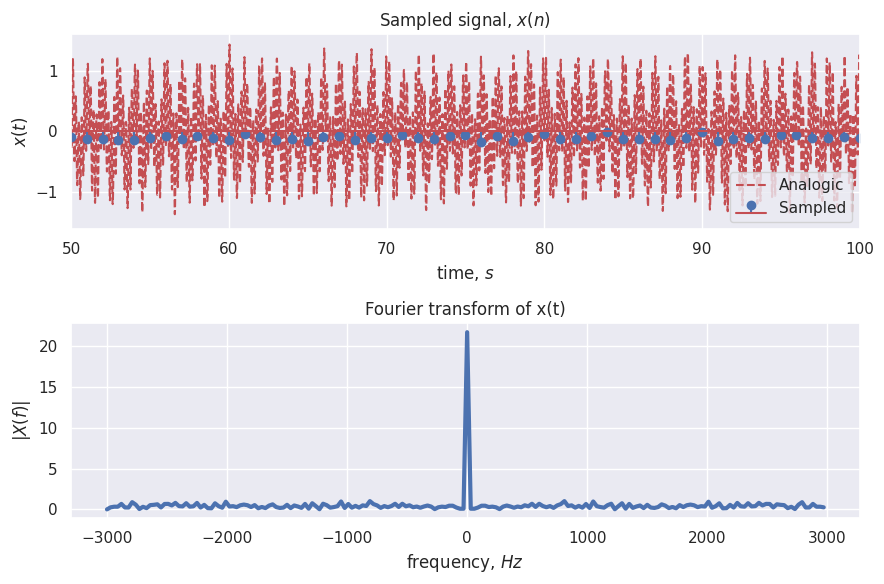

In [111]:
L = 10

# Low-pass filter
w_c = 2*np.pi*f_s/(2*L)
filt = w_c**2 / ((w_c**2 - (2*np.pi*f_sampled)**2) +1j*np.sqrt(2)*w_c*2*np.pi*f_sampled)

Xf_filt = Xf_sampled*filt
xn_filt = ifft(ifftshift(Xf_filt))
# Defining sampling arrays
t_decimated = np.arange(0, int(t_sampled.size/L))
x_decimated = np.zeros(t_decimated.size)

# Sampling
for i in range(x_decimated.size):
    x_decimated[i] = xn_filt.real[int(i*L)]
#     t_decimated[i] = t_sampled[int(i*L)]
plt.figure(figsize=(9,6))


plt.subplot(2,1,1)
plt.plot(t*f_s/L, xt_filtered, '--r')
plt.stem(t_decimated, x_decimated)
plt.title("Sampled signal, $x(n)$")
plt.xlabel("time, $s$")
plt.ylabel("$x(t)$")
plt.legend(['Analogic', 'Sampled'])
# Only shows two periods
plt.xlim(50, 100)

# Frequency domain

plt.subplot(2,1,2)

Xf_decimated = fftshift(fft(x_decimated))
f_decimated = fftshift(fftfreq(t_decimated.size, 1/f_s))

plt.plot(f_decimated, np.abs(Xf_decimated), linewidth=3)
plt.grid("on", which="both")
# plt.xlim(-2*f_s/2, 2*f_s/2)
plt.title("Fourier transform of x(t)")
plt.xlabel("frequency, $Hz$")
plt.ylabel("$|X(f)|$")

plt.tight_layout()
plt.show()

***
## Interpolation
***

Interpolation is insert samples in signal. 

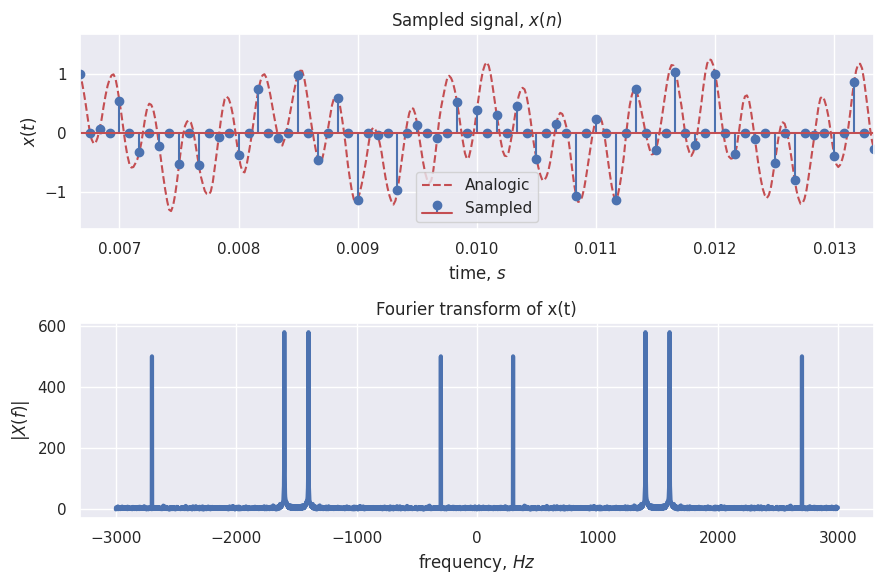

In [672]:
M = 1

t_interpolated = np.arange(0, 100/f_1, 1/f_s/(M+1))
x_interpolated = np.zeros(t_interpolated.size)

# Sampling
for i in range(xn.size):
    x_interpolated[i*(M+1)] = xn.real[i]
plt.figure(figsize=(9,6))


plt.subplot(2,1,1)
plt.plot(t, xt_filtered, '--r')
plt.stem(t_interpolated, x_interpolated)
plt.title("Sampled signal, $x(n)$")
plt.xlabel("time, $s$")
plt.ylabel("$x(t)$")
plt.legend(['Analogic', 'Sampled'])
# Only shows two periods
plt.xlim(2/f_1, 4/f_1)

# Frequency domain

plt.subplot(2,1,2)

Xf_interpolated = fftshift(fft(x_interpolated))
f_interpolated = fftshift(fftfreq(t_interpolated.size, t_sampled[1]-t_sampled[0]))

plt.plot(f_interpolated, np.abs(Xf_interpolated), linewidth=3)
plt.grid("on", which="both")
# plt.xlim(-f_s/6, f_s/6)
plt.title("Fourier transform of x(t)")
plt.xlabel("frequency, $Hz$")
plt.ylabel("$|X(f)|$")

plt.tight_layout()
plt.show()

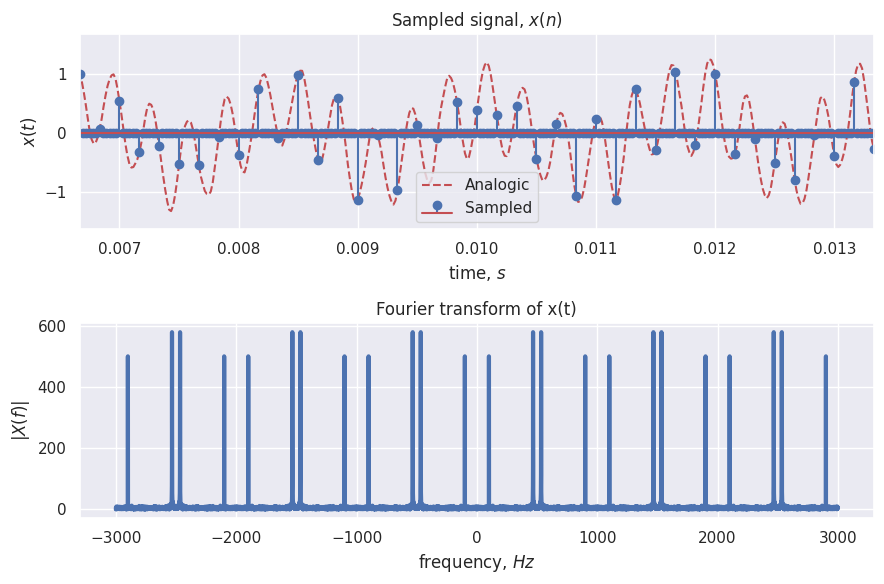

In [675]:
M = 5

t_interpolated = np.arange(0, 100/f_1, 1/f_s/(M+1))
x_interpolated = np.zeros(t_interpolated.size)

# Sampling
for i in range(xn.size):
    x_interpolated[i*(M+1)] = xn.real[i]
plt.figure(figsize=(9,6))


plt.subplot(2,1,1)
plt.plot(t, xt_filtered, '--r')
plt.stem(t_interpolated, x_interpolated)
plt.title("Sampled signal, $x(n)$")
plt.xlabel("time, $s$")
plt.ylabel("$x(t)$")
plt.legend(['Analogic', 'Sampled'])
# Only shows two periods
plt.xlim(2/f_1, 4/f_1)

# Frequency domain

plt.subplot(2,1,2)

Xf_interpolated = fftshift(fft(x_interpolated))
f_interpolated = fftshift(fftfreq(t_interpolated.size, t_sampled[1]-t_sampled[0]))

plt.plot(f_interpolated, np.abs(Xf_interpolated), linewidth=3)
plt.grid("on", which="both")
# plt.xlim(-f_s/6, f_s/6)
plt.title("Fourier transform of x(t)")
plt.xlabel("frequency, $Hz$")
plt.ylabel("$|X(f)|$")

plt.tight_layout()
plt.show()

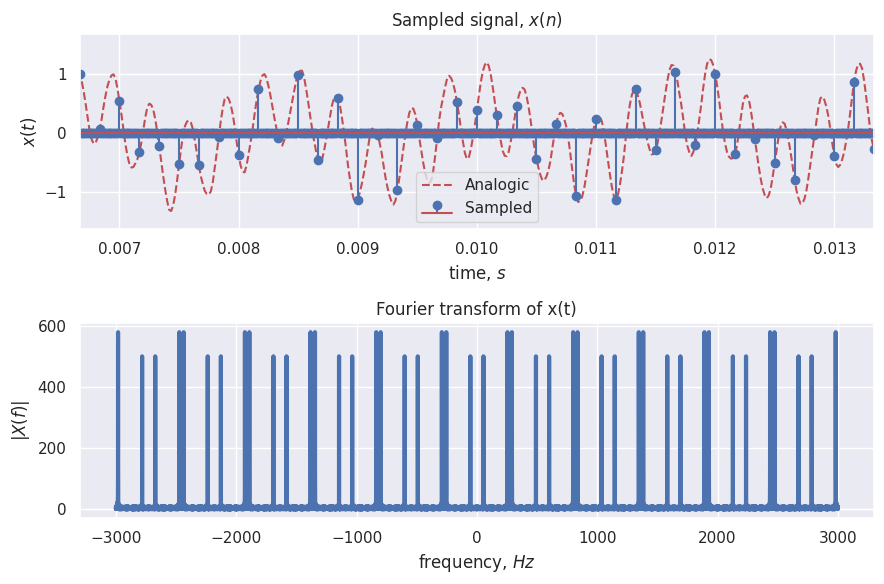

In [676]:
M = 10

t_interpolated = np.arange(0, 100/f_1, 1/f_s/(M+1))
x_interpolated = np.zeros(t_interpolated.size)

# Sampling
for i in range(xn.size):
    x_interpolated[i*(M+1)] = xn.real[i]
plt.figure(figsize=(9,6))


plt.subplot(2,1,1)
plt.plot(t, xt_filtered, '--r')
plt.stem(t_interpolated, x_interpolated)
plt.title("Sampled signal, $x(n)$")
plt.xlabel("time, $s$")
plt.ylabel("$x(t)$")
plt.legend(['Analogic', 'Sampled'])
# Only shows two periods
plt.xlim(2/f_1, 4/f_1)

# Frequency domain

plt.subplot(2,1,2)

Xf_interpolated = fftshift(fft(x_interpolated))
f_interpolated = fftshift(fftfreq(t_interpolated.size, t_sampled[1]-t_sampled[0]))

plt.plot(f_interpolated, np.abs(Xf_interpolated), linewidth=3)
plt.grid("on", which="both")
# plt.xlim(-f_s/6, f_s/6)
plt.title("Fourier transform of x(t)")
plt.xlabel("frequency, $Hz$")
plt.ylabel("$|X(f)|$")

plt.tight_layout()
plt.show()